# Лабораторная работа 2
Визуализация данных

Выполнила: 6132-010402, Скиданова Анна Романовна

0. Загружаем в pandas любой набор данных, в котором есть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий. Опишите ваши данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
import matplotlib.pylab as plt
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


### Считывание данных

In [245]:
# Таблица клиентов
data_t = pd.read_csv("marketing_campaign.csv", sep="\t")
data_t

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### Описание данных

In [246]:
data_t.dtypes 

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

##### Пояснение для каждой колонки: 

ID: Customer's unique identifier   
Year_Birth: Customer's birth year   
Education: Customer's education level   
Marital_Status: Customer's marital status  
Income: Customer's yearly household income   
Kidhome: Number of children in customer's household   
Teenhome: Number of teenagers in customer's household    
Dt_Customer: Date of customer's enrollment with the company     
Recency: Number of days since customer's last purchase    
Complain: 1 if the customer complained in the last 2 years, 0 otherwise   

MntWines: Amount spent on wine in last 2 years   
MntFruits: Amount spent on fruits in last 2 years   
MntMeatProducts: Amount spent on meat in last 2 years   
MntFishProducts: Amount spent on fish in last 2 years    
MntSweetProducts: Amount spent on sweets in last 2 years   
MntGoldProds: Amount spent on gold in last 2 years   

NumDealsPurchases: Number of purchases made with a discount   
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise    
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise    
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise   
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise   
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise   
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise   

NumWebPurchases: Number of purchases made through the company’s website   
NumCatalogPurchases: Number of purchases made using a catalogue    
NumStorePurchases: Number of purchases made directly in stores   
NumWebVisitsMonth: Number of visits to company’s website in the last month    

1. Matplotlib

1.1 Построить любой график (любого рода) с помощью чистого matplotlib / pylab

1.2 Построить несколько суб-графиков на одном графике используя .subplot.

Графики должны быть разных типов и хотя бы два из них должны быть связаны с вашим датасетом.
Хотя бы в одном графике подпишите оси.
Во всех графиках подписать название графика.


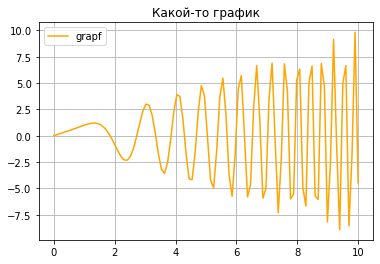

In [248]:
# 1.1
x = np.linspace(0, 10, 100)
plt.plot( x, x*np.cos(x*((-(x-1)))), label='grapf',color='orange')
plt.legend()
plt.title("Какой-то график")
plt.grid()

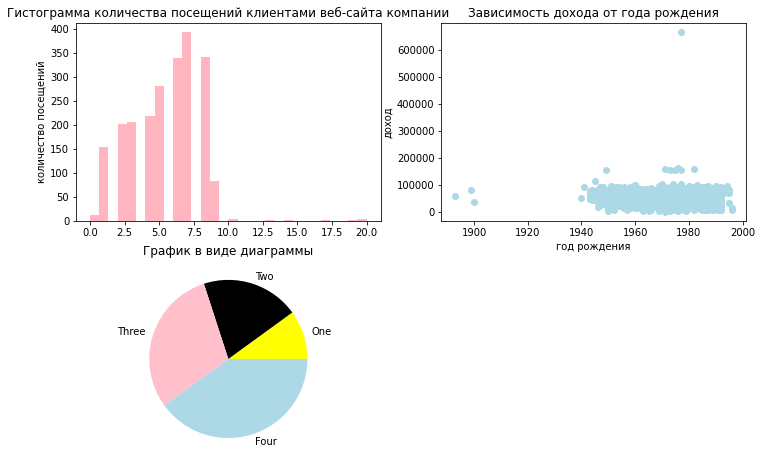

In [249]:
#1.2
pylab.figure(figsize=(12,8))

pylab.subplot(2,2,2)
plt.scatter(data_t.Year_Birth, data_t.Income, color='lightblue')
plt.title('Зависимость дохода от года рождения')
plt.xlabel('год рождения')
plt.ylabel('доход')

pylab.subplot(2,2,1)
n, bin, patches = plt.hist(data_t.NumWebVisitsMonth, bins=30,color='lightpink')
plt.title('Гистограмма количества посещений клиентами веб-сайта компании')
plt.ylabel('количество посещений')

pylab.subplot(2,2,3)
labels = ['One','Two','Three','Four']
values = [10,20,30,40]
colors = ['yellow','black','pink','lightblue']
plt.title('График в виде диаграммы')
plt.pie(values,labels=labels,colors=colors)

pylab.show()

2.  На основе Вашего датасета построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot (мануал) Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой).
Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

<AxesSubplot:title={'center':'Зависимость количества покупаемого вина от количества детей'}, xlabel='Kidhome'>

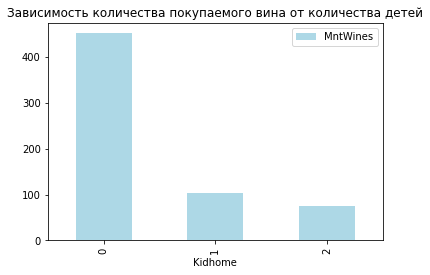

In [250]:
# first
data_t[["Kidhome","MntWines"]].groupby("Kidhome").mean().plot(kind='bar',title="Зависимость количества покупаемого вина от количества детей", color='lightblue')

Распределение дохода в зависимости от уровня образования


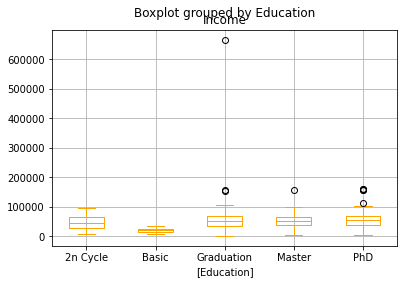

In [251]:
# second
data_t[["Education","Income"]].boxplot( by="Education",color="orange")
print("Распределение дохода в зависимости от уровня образования")

<AxesSubplot:title={'center':'Гистограмма по году рождения'}, ylabel='Frequency'>

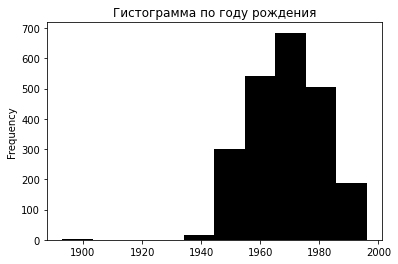

In [252]:
# third
data_t['Year_Birth'].plot(kind="hist",color="black", title='Гистограмма по году рождения')

3.  Seaborn

3.1 Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных

3.2 Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных

3.3 Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального

3.4 Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика)


Анализируем взаимосвязь нескольких признаков


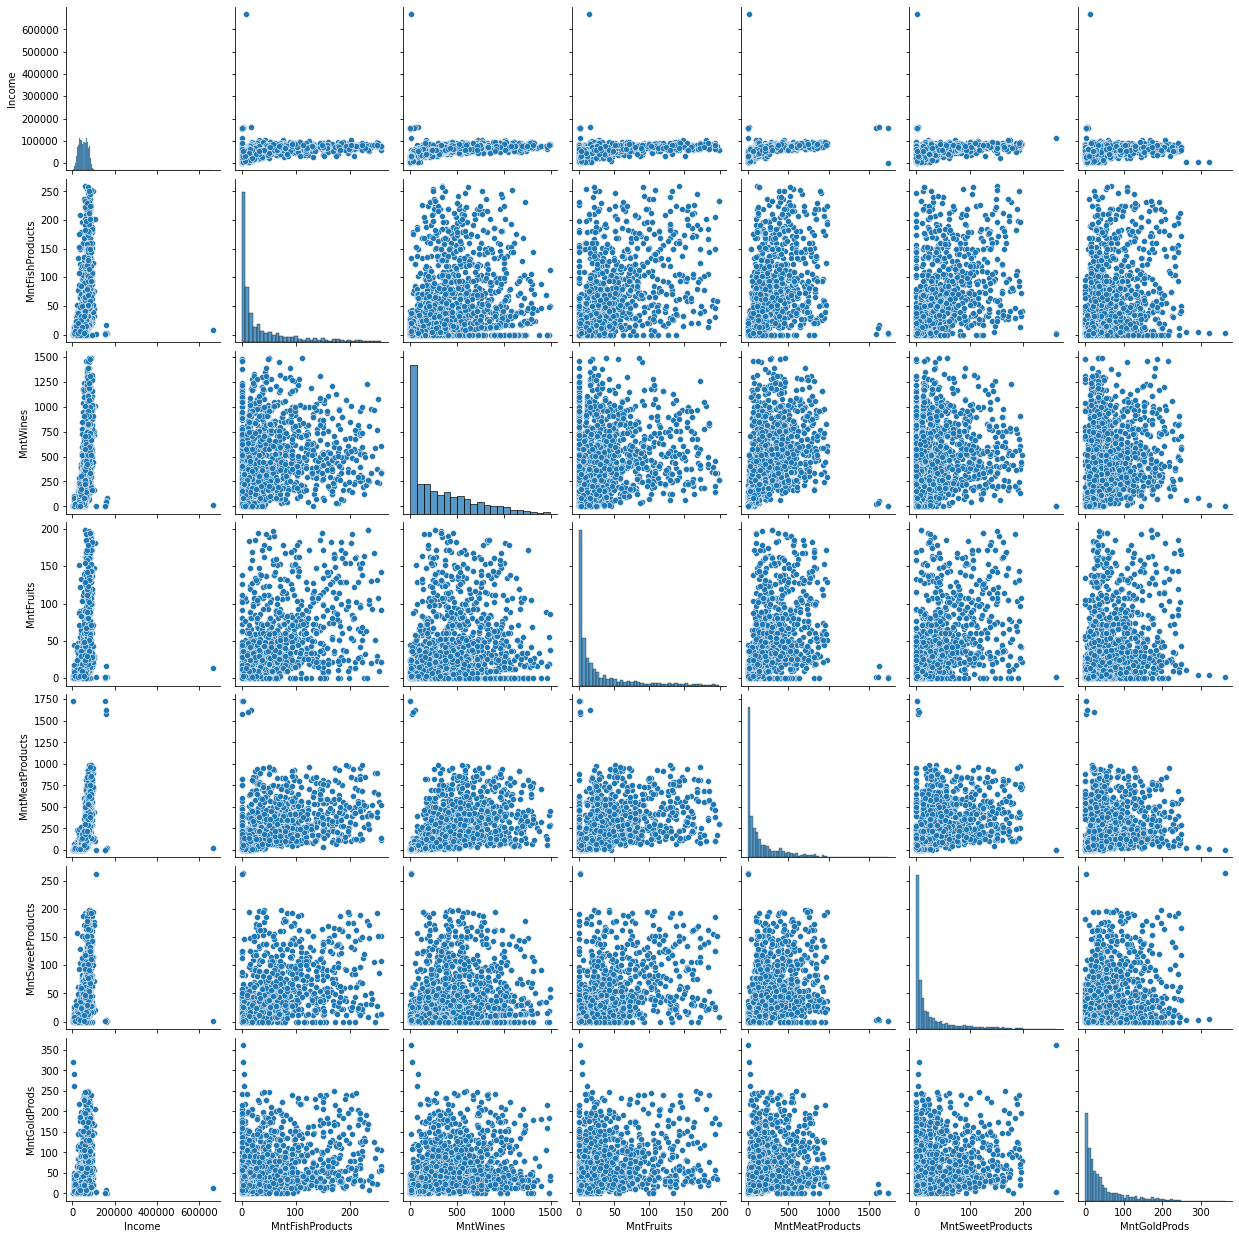

In [253]:
# 3.1
print("Анализируем взаимосвязь нескольких признаков")
sns.pairplot(data_t[['Income','MntFishProducts','MntWines','MntFruits','MntMeatProducts','MntSweetProducts','MntGoldProds']])

Анализируем взаимосвязь приснака MntFruits с признаком MntWines


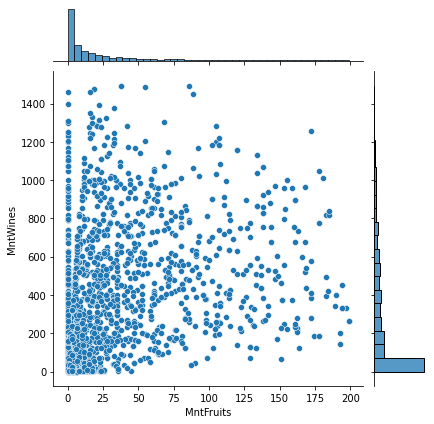

In [254]:
# 3.2
print("Анализируем взаимосвязь приснака MntFruits с признаком MntWines")
sns.jointplot(data=data_t,x="MntFruits", y="MntWines")

Количество покупаемых фруктов в зависимости от количества детей


<AxesSubplot:xlabel='Kidhome', ylabel='MntFruits'>

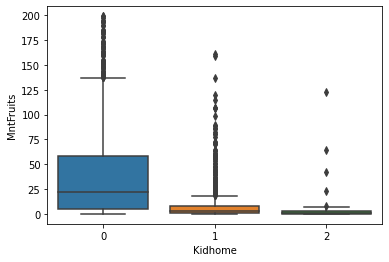

In [255]:
# 3.3
print("Количество покупаемых фруктов в зависимости от количества детей")
sns.boxplot(data=data_t,x='Kidhome',y='MntFruits')

График heatmap попарной корреляции всех числовых признаков


<AxesSubplot:>

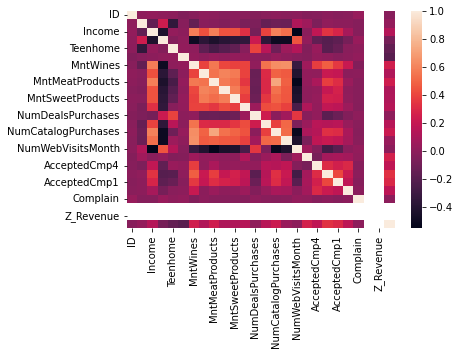

In [256]:
# 3.4
# Убираем категориальные признаки
dt=data_t.dtypes 
n_n=[]
col=data_t.columns
for i in range (0,data_t.shape[1]):
    if (dt[i]!='object'):
        n_n.append(col[i])
print("График heatmap попарной корреляции всех числовых признаков")
sns.heatmap(data_t[n_n].corr())

4. Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению

Смотрим соответствие Recency нормальному распределению и гистаграмму


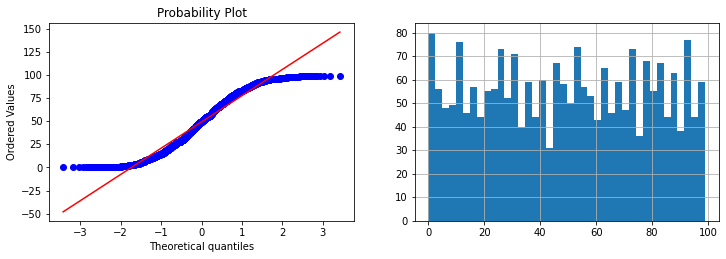

In [257]:
print("Смотрим соответствие Recency нормальному распределению и гистаграмму")
pylab.figure(figsize=(12,8))

pylab.subplot(2,2,1)
stats.probplot( data_t.Recency, dist="norm", plot=pylab)

pylab.subplot(2,2,2)
data_t.Recency.hist( bins = 40 )

pylab.show()


5. Построить любой график (связанный с вашими данными) с помощью plotly

In [258]:
import plotly.express as px
print("Гистограмма для MntSweetProducts")
px.histogram(data_t, x='MntSweetProducts')

Гистограмма для MntSweetProducts
